## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             ConfusionMatrixDisplay)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

## Load Cleaned Data

In [2]:
df = pd.read_csv("../data/bank_cleaned.csv")
data = df.copy()

## Separate Features and Target

In [3]:
X = data.drop(columns=['deposit'])
y = data['deposit']

## Split Dataset

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Baseline Model (Before Tuning)

In [5]:
rf_baseline = RandomForestClassifier(random_state=42)
rf_baseline.fit(X_train, y_train)
y_pred_baseline = rf_baseline.predict(X_test)
y_proba_baseline = rf_baseline.predict_proba(X_test)[:, 1]

baseline_results = {
    'Accuracy': accuracy_score(y_test, y_pred_baseline),
    'Precision': precision_score(y_test, y_pred_baseline),
    'Recall': recall_score(y_test, y_pred_baseline),
    'F1-score': f1_score(y_test, y_pred_baseline),
    'AUC-ROC': roc_auc_score(y_test, y_proba_baseline)
}

print("🔹 Baseline Random Forest Performance:")
for k, v in baseline_results.items():
    print(f"{k}: {v:.3f}")

🔹 Baseline Random Forest Performance:
Accuracy: 0.845
Precision: 0.813
Recall: 0.873
F1-score: 0.842
AUC-ROC: 0.911


## Define Parameter Grid for Grid Search

In [6]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

## Perform Grid Search

In [7]:
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=2
)

grid_search.fit(X_train, y_train)
print("✅ Best Parameters Found:", grid_search.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=

## Evaluate Tuned Model (After Tuning)

In [8]:
best_rf = grid_search.best_estimator_
y_pred_tuned = best_rf.predict(X_test)
y_proba_tuned = best_rf.predict_proba(X_test)[:, 1]

tuned_results = {
    'Accuracy': accuracy_score(y_test, y_pred_tuned),
    'Precision': precision_score(y_test, y_pred_tuned),
    'Recall': recall_score(y_test, y_pred_tuned),
    'F1-score': f1_score(y_test, y_pred_tuned),
    'AUC-ROC': roc_auc_score(y_test, y_proba_tuned)
}

print("\n🔹 Tuned Random Forest Performance:")
for k, v in tuned_results.items():
    print(f"{k}: {v:.3f}")


🔹 Tuned Random Forest Performance:
Accuracy: 0.841
Precision: 0.806
Recall: 0.874
F1-score: 0.839
AUC-ROC: 0.912


## Confusion Matrix Comparison

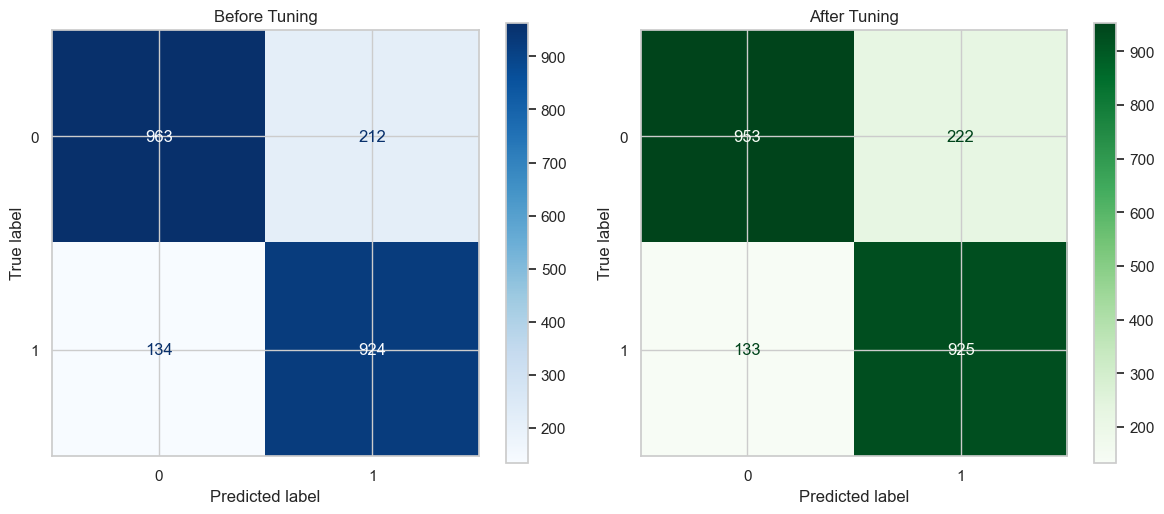

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Baseline
ConfusionMatrixDisplay.from_estimator(rf_baseline, X_test, y_test, ax=axes[0], cmap='Blues')
axes[0].set_title("Before Tuning")

# Tuned
ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test, ax=axes[1], cmap='Greens')
axes[1].set_title("After Tuning")

plt.tight_layout()
plt.show()

## Compare Before vs After

In [10]:
comparison = pd.DataFrame([baseline_results, tuned_results], index=['Before Tuning', 'After Tuning'])
print("\n🔸 Model Comparison:")
display(comparison)


🔸 Model Comparison:


,Accuracy,Precision,Recall,F1-score,AUC-ROC
Before Tuning,0.845052,0.813380,0.873346,0.842297,0.910897
After Tuning,0.841021,0.806452,0.874291,0.839002,0.912181
